<a href="https://colab.research.google.com/github/0007anuragsharma/Python-logical/blob/main/3_janurary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv("/content/linkedin-reviews.csv")
df

,Review,Rating
0,Does absolutely nothing for a LinkedIn beginne...,1
1,Force close(galaxy tab),1
2,Slow and it tries to upload your contacts with...,1
3,Add ability to customize the profile and move ...,4
4,"Good app, but it's a pain that it's not possib...",4
...,...,...
697,"Can't trust, Going to uninstall just for that ...",1
698,It really gets me linked in with my friends. H...,5
699,It lacks most of what makes the other social n...,4
700,Really disappointed in the new version. Seems ...,2


In [4]:
df.head()

,Review,Rating
0,Does absolutely nothing for a LinkedIn beginne...,1
1,Force close(galaxy tab),1
2,Slow and it tries to upload your contacts with...,1
3,Add ability to customize the profile and move ...,4
4,"Good app, but it's a pain that it's not possib...",4


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  702 non-null    object
 1   Rating  702 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 11.1+ KB


In [ ]:
# Exploratory Data Analysis==>
#                We will start by analyzing the distributions of ratings . It will provide insight into the overall sentiment
# of the reviews.Then we can explore further , such as analyzing the length of reviews,and possibly derive insights from the .
# the text of the reviews.

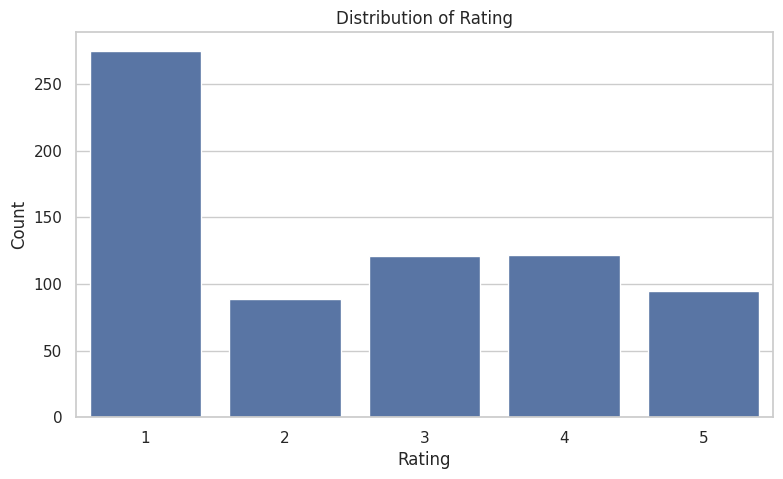

In [8]:
# PLOTTING THE DISTIBUTION OF RATINGS

sns.set(style = 'whitegrid')
plt.figure(figsize = (9,5))
sns.countplot(data = df , x='Rating')
plt.title('Distribution of Rating')
plt.xlabel("Rating")
plt.ylabel('Count')
plt.show()

In [ ]:
# Adding Sentiment Labels in the Data

# we will use Textblob library. Texblob provides a polarity score raning from -1(very negative) to 1(very positive) for a given text
# we can use this score to classify each reviews sentiment as positive,negative or neutral.

In [9]:
!pip install textblob

In [10]:
from textblob import TextBlob


In [12]:
def textblob_sentiment_analysis(review):
  sentiment= TextBlob(review).sentiment
  if sentiment.polarity > 0.1:
    return 'Positive'
  elif sentiment.polarity <-0.1:
    return 'Negative'
  else:
    return'Neutral'

In [13]:
df['Sentiment']= df['Review'].apply(textblob_sentiment_analysis)

In [15]:
df.sample(5)

,Review,Rating,Sentiment
129,"It won't work. It loads, and shows the icons, ...",1,Neutral
177,"HTC Inspire, just keeps loading. Can't do anyt...",1,Neutral
636,Version 2 is a great application compared with...,4,Positive
316,Very limited. Can't update profile from app.,2,Neutral
303,"No app2sd enabled, so being deinstalled.",1,Neutral


In [17]:
# Analyzing app Reviews Sentiments

sentiment_distribution = df['Sentiment'].value_counts()
sentiment_distribution

,count
Sentiment,
Positive,298
Neutral,297
Negative,107


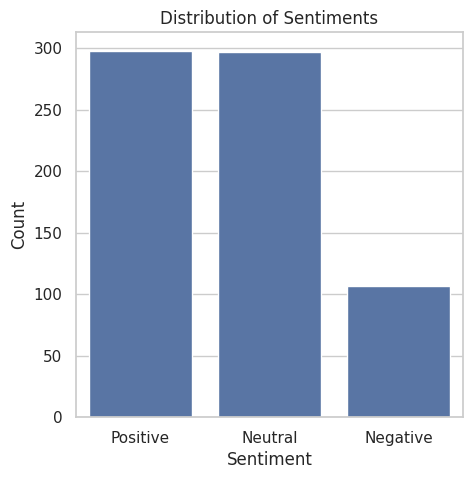

In [19]:
plt.figure(figsize = (5,5))
sns.barplot(x=sentiment_distribution.index,
            y=sentiment_distribution.values)
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [ ]:
# So , we can see althrough the app has low ratings , still the reviewers don't use
#  many negative words in the reviews for the app.
# Next we will explore the relationship between the sentiments and the ratings . This analysis
# can help us understand whether there is a correlation between the sentiment of the text
# numerical ratings

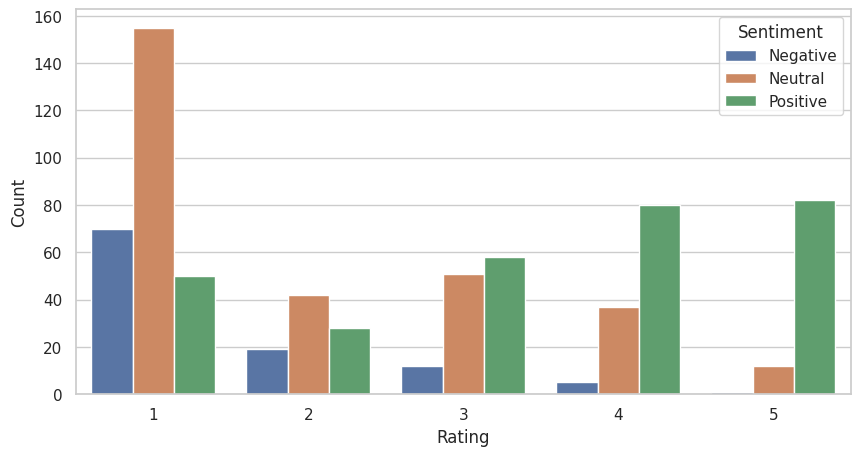

In [22]:
plt.figure(figsize = (10,5))

sns.countplot(data = df,
              x = 'Rating',
              hue = 'Sentiment')
plt.xlabel("Rating")
plt.ylabel("Count")
plt.legend(title = 'Sentiment')
plt.show()

In [ ]:
# Summary ==>
# App Reviews sentiment Analysis is a valuble tool for app developers and businees to understand user feedback,prioritize
# feature updates and maintain a positive user comunity . It involves using data analysis techinique to determine whether
# the sentiments in these reviews are positive negative or neutral

